In [1]:
import pandas as pd
import matplotlib as plt
# from mpl_toolkits.basemap import Basemap
soil_df = pd.read_csv('df_soil_mean_loc.csv', header=0, delim_whitespace=False)

In [2]:
# bin lead and arsenic 
# Source: http://www.austintexas.gov/page/soil-kitchen-results
soil_df['Lead_Bin'] = pd.cut(soil_df['Lead'], bins=[-1, 3, 500, 2000], labels=["Low", "Mid", "High"])
soil_df['Arsenic_Bin'] = pd.cut(soil_df['Arsenic'], bins=[-1, 5, 24, 100], labels=["Low", "Mid", "High"])

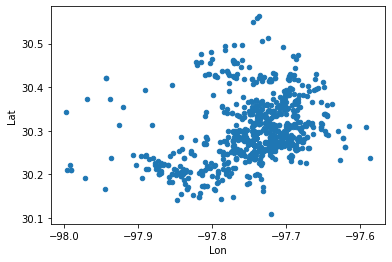

In [3]:
soil_df.plot(x='Lon', y='Lat', kind='scatter')

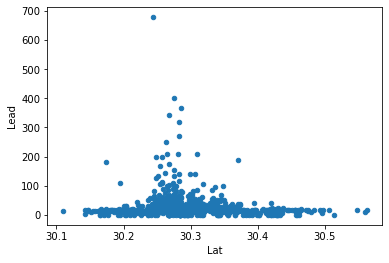

In [4]:
soil_df.plot(x='Lat', y='Lead', kind='scatter')

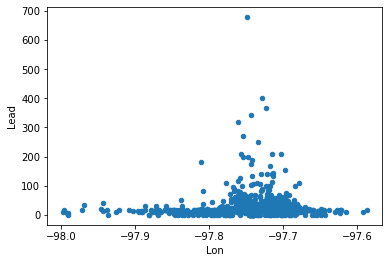

In [5]:
soil_df.plot(x='Lon', y='Lead', kind='scatter')

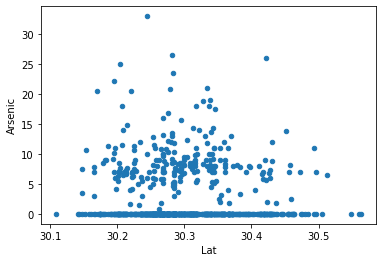

In [6]:
soil_df.plot(x='Lat', y='Arsenic', kind='scatter')

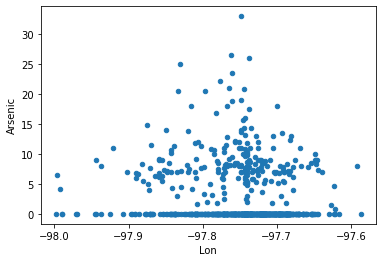

In [7]:
soil_df.plot(x='Lon', y='Arsenic', kind='scatter')

In [8]:
soil_df.describe()

,Unnamed: 0,Unnamed: 0.1,Lead,Arsenic,Lat,Lon,Lead_Standardized,Arsenic_Standardized
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,8.470000e+02,8.470000e+02
mean,423.000000,423.000000,27.216094,2.385090,30.297183,-97.746490,2.936127e-17,1.572925e-17
std,244.652134,244.652134,44.246050,4.630102,0.070419,0.058551,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,30.109070,-97.997680,-6.151079e-01,-5.151268e-01
25%,211.500000,211.500000,11.700000,0.000000,30.255920,-97.769235,-3.506775e-01,-5.151268e-01
50%,423.000000,423.000000,16.000000,0.000000,30.284160,-97.740610,-2.534937e-01,-5.151268e-01
75%,634.500000,634.500000,25.206667,3.387500,30.338545,-97.710975,-4.541485e-02,2.164985e-01
max,846.000000,846.000000,678.000000,33.000000,30.562580,-97.586850,1.470829e+01,6.612145e+00


In [9]:
soil_df = soil_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [10]:
soil_df['Lead_Standardized'] = (soil_df['Lead']-soil_df['Lead'].mean())/soil_df['Lead'].std()
soil_df['Arsenic_Standardized'] = (soil_df['Arsenic']-soil_df['Arsenic'].mean())/soil_df['Arsenic'].std()

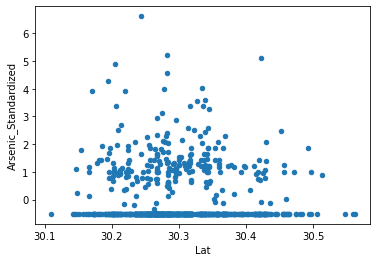

In [11]:
soil_df.plot(x='Lat', y='Arsenic_Standardized', kind='scatter')

In [12]:
soil_df.head()

,Intersection,Lead,Arsenic,Lat,Lon,Lead_Bin,Arsenic_Bin,Lead_Standardized,Arsenic_Standardized
0,10th @ Menden,24.00,0.00,30.27069,-97.73753,Mid,Low,-0.072687,-0.515127
1,10th @ Prospect -- Back,98.00,0.00,30.26427,-97.71782,Mid,Low,1.599779,-0.515127
2,10th @ Prospect -- Front,51.00,0.00,30.26427,-97.71782,Mid,Low,0.537537,-0.515127
3,10th St.@Theresa Ave,62.00,9.11,30.28143,-97.76490,Mid,Mid,0.786147,1.452432
4,10th@Northwestern,19.37,0.00,30.26604,-97.71402,Mid,Low,-0.177329,-0.515127


In [13]:
# soil_df.to_csv('df_soil_mean_loc.csv')

In [14]:
# Based on https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5 
# I am going to try Lasso, Elastic Net, SVR and GaussianProcessRegressor and see which one has the best fit. ?

In [15]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(soil_df[['Lat', 'Lon']], soil_df['Lead'], random_state=13)

In [16]:
from sklearn import linear_model
lead_lasso = linear_model.Lasso(alpha=0.1)
lead_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lead_lasso.score(X_test, y_test)

0.00748407724920086

In [18]:
lead_elastic = linear_model.ElasticNet(random_state=0)
lead_elastic.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lead_elastic.score(X_test, y_test)

-0.004742770702125476

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
lead_gaussian = GaussianProcessRegressor(kernel=kernel,random_state=0)
lead_gaussian.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)

In [21]:
lead_gaussian.score(X_test, y_test)

-0.004755522815156343

In [22]:
from sklearn.svm import SVR
lead_svr = SVR()
lead_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
lead_svr.score(X_test, y_test)

-0.02976653416544739

In [24]:
from sklearn.cluster import KMeans

In [25]:
from sklearn.svm import SVC
lead_svc = SVC()
lead_svc.fit(X_train.astype('int'), y_train.astype('int'))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
lead_svc.score(X_test.astype('int'), y_test.astype('int')) 
# this returns the mean accuracy

0.18867924528301888

In [67]:
soil_df_arsenic = soil_df[['Lat', 'Lon', 'Arsenic', 'Arsenic_Bin', 'Arsenic_Standardized']].copy()
soil_df_arsenic = soil_df_arsenic[soil_df_arsenic['Arsenic'] != 0]
soil_df_ars_max = soil_df_arsenic.groupby(by=['Lat', 'Lon']).max().reset_index()
soil_df_ars_med = soil_df_arsenic.groupby(by=['Lat', 'Lon']).median().reset_index()

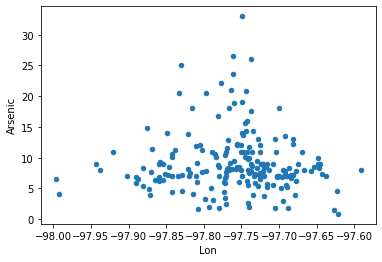

In [71]:
soil_df_ars_max.plot(x='Lon', y='Arsenic', kind='scatter')

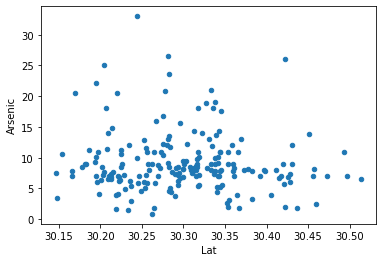

In [72]:
soil_df_ars_max.plot(x='Lat', y='Arsenic', kind='scatter')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(soil_df_ars_max[['Lat', 'Lon']], soil_df_ars_max['Arsenic'], random_state=13)

In [74]:
ars_svr = SVR()
ars_svr.fit(X_train, y_train)

ars_svr.score(X_test, y_test)

-0.03601237766954246

In [75]:
ars_svc = SVC()
ars_svc.fit(X_train.astype('int'), y_train.astype('int'))

ars_svc.score(X_test.astype('int'), y_test.astype('int')) 
# this returns the mean accuracy

0.16

In [30]:
import math

def haversine(coord1,coord2,coord3,coord4):
    
        lon1,lat1=coord1,coord2
        lon2,lat2=coord3,coord4

        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
        math.cos(phi_1)*math.cos(phi_2)*\
        math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))

        meters=R*c                    # output distance in meters
        km=meters/1000.0              # output distance in kilometers
        miles=meters*0.000621371      # output distance in miles
        feet=miles*5280               # output distance in feet
        
        return meters

In [31]:
import numpy as np
haversine_v = np.vectorize(haversine)

In [80]:
max_lat = soil_df['Lat'][soil_df['Lead'] == soil_df['Lead'].max()].loc[260]
max_lon = soil_df['Lon'][soil_df['Lead'] == soil_df['Lead'].max()].loc[260]
soil_df['Lat_Max'] = max_lat
soil_df['Lon_Max'] = max_lon

In [81]:
soil_df.head()

,Intersection,Lead,Arsenic,Lat,Lon,Lead_Bin,Arsenic_Bin,Lead_Standardized,Arsenic_Standardized,Lat_Max,Lon_Max
0,10th @ Menden,24.00,0.00,30.27069,-97.73753,Mid,Low,-0.072687,-0.515127,30.24388,-97.74866
1,10th @ Prospect -- Back,98.00,0.00,30.26427,-97.71782,Mid,Low,1.599779,-0.515127,30.24388,-97.74866
2,10th @ Prospect -- Front,51.00,0.00,30.26427,-97.71782,Mid,Low,0.537537,-0.515127,30.24388,-97.74866
3,10th St.@Theresa Ave,62.00,9.11,30.28143,-97.76490,Mid,Mid,0.786147,1.452432,30.24388,-97.74866
4,10th@Northwestern,19.37,0.00,30.26604,-97.71402,Mid,Low,-0.177329,-0.515127,30.24388,-97.74866


In [82]:
LON_1 = np.array([row for row in soil_df['Lon']])
LAT_1 = np.array([row for row in soil_df['Lat']])

LON_2 = np.array([row for row in soil_df['Lon_Max']])
LAT_2 = np.array([row for row in soil_df['Lat_Max']])

In [93]:
soil_df['distance_m'] = haversine_v(LON_1, LAT_1, LON_2, LAT_2)

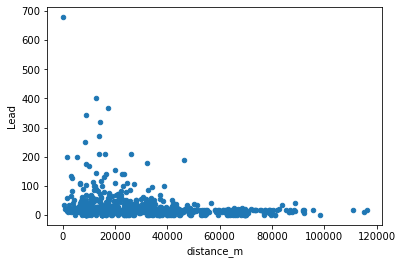

In [94]:
soil_df.plot(x='distance_m', y='Lead', kind='scatter')

In [ ]:
# from sklearn.cluster import KMeans
# km = KMeans(3, init='k-means++') # initialize
# km.fit(soil_df[['Lat', 'Lon']])
# c = km.predict(soil_df[['Lat', 'Lon']]) # classify into three clusters

I am now going to attempt grouping the data by max and median to see what the best fits are

In [143]:
soil_df_lead = soil_df[['distance_m', 'Lat', 'Lon', 'Lead']][soil_df['Lead'] != 0].copy()
soil_df_lead['Log(Lead)'] = np.log10(soil_df_lead['Lead'])
# soil_df_lead[['Lat', 'Lon']] = soil_df_lead[['Lat', 'Lon']].round(4)
soil_df_lead_max = soil_df_lead.groupby(by=['distance_m']).max().reset_index()
soil_df_lead_med = soil_df_lead.groupby(by=['distance_m']).median().reset_index()

In [144]:
{'og_leng': len(soil_df_lead), 'max_len': len(soil_df_lead_max), 'med_len': len(soil_df_lead_med)}

{'og_leng': 772, 'max_len': 625, 'med_len': 625}

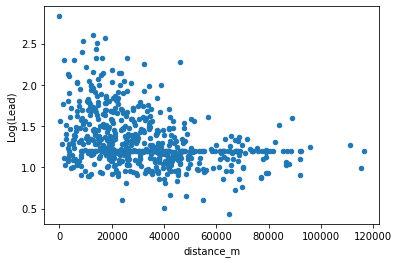

In [145]:
soil_df_lead_max.plot(x='distance_m', y='Log(Lead)', kind='scatter')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(soil_df_lead_max['distance_m'], soil_df_lead_max['Log(Lead)'], random_state=13)

In [147]:
max_lead_linreg = linear_model.LinearRegression()
max_lead_linreg.fit(pd.DataFrame(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
max_lead_linreg.score(pd.DataFrame(X_test), y_test)

0.12964923828326225

In [130]:
X_train, X_test, y_train, y_test = train_test_split(soil_df_lead_max[['Lat', 'Lon']], soil_df_lead_max['Lead'], random_state=13)

In [135]:
type(y_train)

pandas.core.series.Series

In [62]:
lead_svr = SVR()
lead_svr.fit(X_train, y_train)

lead_svr.score(X_test, y_test)

-0.06354358236818292

In [63]:
lead_svc = SVC()
lead_svc.fit(X_train.astype('int'), y_train.astype('int'))

lead_svc.score(X_test.astype('int'), y_test.astype('int')) 
# this returns the mean accuracy

0.20118343195266272

In [64]:
X_train, X_test, y_train, y_test = train_test_split(soil_df_lead_med[['Lat', 'Lon']], soil_df_lead_med['Lead'], random_state=13)

In [65]:
lead_svr = SVR()
lead_svr.fit(X_train, y_train)

lead_svr.score(X_test, y_test)

-0.05634063489518782

In [66]:
lead_svc = SVC()
lead_svc.fit(X_train.astype('int'), y_train.astype('int'))

lead_svc.score(X_test.astype('int'), y_test.astype('int')) 
# this returns the mean accuracy

0.17751479289940827